# crawling 😐

In [1]:
pip install bs4

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install lxml

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install html5lib

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import math
import numpy as np
import requests
from bs4 import BeautifulSoup
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,accuracy_score,recall_score,precision_score, f1_score,confusion_matrix
import sklearn.metrics
from matplotlib import pyplot as plt

In [5]:
links_list = []
url = 'https://en.wikipedia.org/wiki/List_of_Intel_processors'
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

In [6]:
links = soup.find("div", attrs={"class": "div-col"}).find_all("a")
for data in links:
    links_list.append('https://en.wikipedia.org' + data['href'])
    print('https://en.wikipedia.org' + data['href'])
links_list.pop(0)
links_list.pop(0)
links_list.pop(0)
links_list.pop(1)
links_list.pop()
links_list.pop()
links_list.append(url)

https://en.wikipedia.org/wiki/List_of_AMD_processors
https://en.wikipedia.org/wiki/List_of_PowerPC_processors
https://en.wikipedia.org/wiki/List_of_Freescale_products
https://en.wikipedia.org/wiki/List_of_Intel_Atom_microprocessors
https://en.wikipedia.org/wiki/List_of_Intel_Xeon_processors
https://en.wikipedia.org/wiki/List_of_Intel_P6-based_Xeon_microprocessors
https://en.wikipedia.org/wiki/List_of_Intel_NetBurst-based_Xeon_microprocessors
https://en.wikipedia.org/wiki/List_of_Intel_Pentium_M_(Yonah)-based_Xeon_microprocessors
https://en.wikipedia.org/wiki/List_of_Intel_Core-based_Xeon_microprocessors
https://en.wikipedia.org/wiki/List_of_Intel_Nehalem-based_Xeon_microprocessors
https://en.wikipedia.org/wiki/List_of_Intel_Sandy_Bridge-based_Xeon_microprocessors
https://en.wikipedia.org/wiki/List_of_Intel_Ivy_Bridge-based_Xeon_microprocessors
https://en.wikipedia.org/wiki/List_of_Intel_Haswell-based_Xeon_microprocessors
https://en.wikipedia.org/wiki/List_of_Intel_Broadwell-based_Xeon_

In [7]:
links_list

['https://en.wikipedia.org/wiki/List_of_Intel_Atom_microprocessors',
 'https://en.wikipedia.org/wiki/List_of_Intel_P6-based_Xeon_microprocessors',
 'https://en.wikipedia.org/wiki/List_of_Intel_NetBurst-based_Xeon_microprocessors',
 'https://en.wikipedia.org/wiki/List_of_Intel_Pentium_M_(Yonah)-based_Xeon_microprocessors',
 'https://en.wikipedia.org/wiki/List_of_Intel_Core-based_Xeon_microprocessors',
 'https://en.wikipedia.org/wiki/List_of_Intel_Nehalem-based_Xeon_microprocessors',
 'https://en.wikipedia.org/wiki/List_of_Intel_Sandy_Bridge-based_Xeon_microprocessors',
 'https://en.wikipedia.org/wiki/List_of_Intel_Ivy_Bridge-based_Xeon_microprocessors',
 'https://en.wikipedia.org/wiki/List_of_Intel_Haswell-based_Xeon_microprocessors',
 'https://en.wikipedia.org/wiki/List_of_Intel_Broadwell-based_Xeon_microprocessors',
 'https://en.wikipedia.org/wiki/List_of_Intel_Skylake-based_Xeon_microprocessors',
 'https://en.wikipedia.org/wiki/List_of_Intel_Kaby_Lake-based_Xeon_microprocessors',
 'h

In [8]:
df_list = []
for i,link in enumerate(links_list):
    print("working on link number {}/{}".format(i+1, len(links_list)))
    tables = pd.read_html(link,attrs = {'class': 'wikitable'},header=0)
    df_list.append(tables)

working on link number 1/36
working on link number 2/36
working on link number 3/36
working on link number 4/36
working on link number 5/36
working on link number 6/36
working on link number 7/36
working on link number 8/36
working on link number 9/36
working on link number 10/36
working on link number 11/36
working on link number 12/36
working on link number 13/36
working on link number 14/36
working on link number 15/36
working on link number 16/36
working on link number 17/36
working on link number 18/36
working on link number 19/36
working on link number 20/36
working on link number 21/36
working on link number 22/36
working on link number 23/36
working on link number 24/36
working on link number 25/36
working on link number 26/36
working on link number 27/36
working on link number 28/36
working on link number 29/36
working on link number 30/36
working on link number 31/36
working on link number 32/36
working on link number 33/36
working on link number 34/36
working on link number 

In [9]:
df_list[0]

[  Modelnumber sSpecnumber  Cores Frequency     L2cache       FSB Mult.  \
 0    Atom 230  SLB6Z (C0)      1   1.6 GHz      512 KB  533 MT/s   12×   
 1    Atom 330  SLG9Y (C0)      2   1.6 GHz  2 × 512 KB  533 MT/s   12×   
 
         Voltage  TDP   Socket  Release date   Partnumber(s) Releaseprice (USD)  
 0  0.9–1.1625 V  4 W  BGA 437  June 3, 2008   AU80586RE025D                $29  
 1  0.9–1.1625 V  8 W  BGA 437  June 3, 2008  AU80587RE0251M                $43  ,
   Modelnumber sSpecnumber  Cores Frequency GPUfrequency     L2cache I/O bus  \
 0   Atom D410  SLBMH (A0)      1  1.67 GHz      400 MHz      512 KB     DMI   
 1   Atom D425  SLBXD (A0)      1  1.83 GHz      400 MHz      512 KB     DMI   
 2   Atom D510  SLBLA (B0)      2  1.67 GHz      400 MHz  2 × 512 KB     DMI   
 3   Atom D525  SLBXC (B0)      2  1.83 GHz      400 MHz  2 × 512 KB     DMI   
 
                      Memory      Voltage   TDP      Socket       Release date  \
 0              1 × DDR2-800  0.8–1.175 V 

In [10]:
df = df_list[0][0]
for lists in df_list:
    for dfs in lists:
        df = df.append(dfs,ignore_index = True)

In [11]:
df.shape[0]*df.shape[1]

461760

In [12]:
df

,Modelnumber,sSpecnumber,Cores,Frequency,L2cache,FSB,Mult.,Voltage,TDP,Socket,...,P-core (performance).1,P-core (performance).2,P-core (performance).3,E-core (efficiency),E-core (efficiency).1,E-core (efficiency).2,E-core (efficiency).3,Product code,Marketing name(s),Codename(s)
0,Atom 230,SLB6Z (C0),1,1.6 GHz,512 KB,533 MT/s,12×,0.9–1.1625 V,4 W,BGA 437,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Atom 330,SLG9Y (C0),2,1.6 GHz,2 × 512 KB,533 MT/s,12×,0.9–1.1625 V,8 W,BGA 437,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Atom 230,SLB6Z (C0),1,1.6 GHz,512 KB,533 MT/s,12×,0.9–1.1625 V,4 W,BGA 437,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Atom 330,SLG9Y (C0),2,1.6 GHz,2 × 512 KB,533 MT/s,12×,0.9–1.1625 V,8 W,BGA 437,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Atom D410,SLBMH (A0),1,1.67 GHz,512 KB,NaN,NaN,0.8–1.175 V,10 W,FC-BGA 559,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80695.0,"Xeon Bronze/Silver/Gold/Platinum x2xx, Xeon W-...",Cascade Lake
4156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80701.0,Core i3/i5/i7-10xxx,Comet Lake
4157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80708.0,Core i3/i5/i7-11xxx,Rocket Lake
4158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80715.0,Core i5/i7-12xxx,Alder Lake


#  🤩טיפול בנתונים


In [13]:
df.describe(include = 'all')

,Modelnumber,sSpecnumber,Cores,Frequency,L2cache,FSB,Mult.,Voltage,TDP,Socket,...,P-core (performance).1,P-core (performance).2,P-core (performance).3,E-core (efficiency),E-core (efficiency).1,E-core (efficiency).2,E-core (efficiency).3,Product code,Marketing name(s),Codename(s)
count,3489,3421,2066,3668,3400,772,953,1185,3664,3855,...,58,58,58,58,51,51,51,135.000000,134,135
unique,2917,2890,74,307,151,29,70,202,432,206,...,23,23,10,10,17,14,9,NaN,125,131
top,Standard power,Standard power,2,2 GHz,2 × 256 KB,1066 MT/s,9×,0.85–1.3625 V,35 W,LGA 3647,...,Freq.,Turbo,6 × 1.25 MB,4 (4),1.8 GHz,3.8 GHz,2 × 2 MB,NaN,canceled,Yonah
freq,79,79,429,151,557,110,68,60,275,230,...,7,7,15,14,7,7,14,NaN,5,2
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80602.555556,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.544075,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80500.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80554.500000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80606.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80646.500000,NaN,NaN


In [14]:
df.drop_duplicates(inplace=True)

In [15]:
col_list = []
for i in range(len(df.columns)):
    print(df.columns[i])
    col_list.append(df.columns[i])

Modelnumber
sSpecnumber
Cores
Frequency
L2cache
FSB
Mult.
Voltage
TDP
Socket
Release date
Partnumber(s)
Releaseprice (USD)
GPUfrequency
I/O bus
Memory
Burst
GPUmodel
Connectivity
SDP
Model Number
sSpec Number
L2-Cache
Front Side Bus
Multiplier
Release Date
Part Number(s)
L3-Cache
Mult
Release Price (USD)
L2 Cache
Turbo
L3cache
Unnamed: 16
Unnamed: 15
Unnamed: 14
Cores(threads)
Turbo Boostall-core/2.0(/max. 3.0)
Modelnumber[7]
Atom (ULV)
Atom (ULV).1
Unnamed: 2
Feature size
Unnamed: 4
x86
x86.1
Unnamed: 7
Unnamed: 8
Unnamed: 9
Unnamed: 10
Unnamed: 11
Unnamed: 12
Processsor branding
Model
Cores (threads)
Base / Boost / TVB Clocks (GHz)
L3 Cache (MB)
GPU EU
GPU Max freq
Price
Model number
Clock speed
Cache
Cache.1
FSB speed
Threadsper core
TDP (W)
Cache.2
Price (USD)
Clock speed.1
QuickPath
Freq. (GHz)
L2 Cache (KB)
FSB (MHz)
Voltage (V)
Freq.
Power
Power.1
Unnamed: 17
Unnamed: 18
Unnamed: 19
Freq. (MHz)
L1cache
Model numberClock speed
sSpec number
L2 cache
Front-side bus
Clock multiplier

In [16]:
df.drop(['L3-Cache','L3 Cache','L3 Cache (MB)','L2 cacheMB',"Cores (threads)",'Product code' ,'Marketing name(s)' ,'Codename(s)','sSpec number','ReleasePrice (USD)','Release price (USD)','Modelnumber','sSpecnumber','Release date','Releaseprice (USD)','sSpec Number','Part Number(s)','Release Price (USD)','Unnamed: 16','Unnamed: 15','Unnamed: 14','Modelnumber[7]','Processsor branding','Model', 'Release Date'],axis = 1,inplace = True)

In [17]:
for col in df.columns:
    print(col, df[col].isnull().sum()/df.shape[0])

Cores 0.5079321663019694
Frequency 0.1162472647702407
L2cache 0.19173960612691465
FSB 0.8033369803063457
Mult. 0.7612144420131292
Voltage 0.700218818380744
TDP 0.11734135667396062
Socket 0.0711159737417943
Partnumber(s) 0.20733041575492342
GPUfrequency 0.6307439824945296
I/O bus 0.4064551422319475
Memory 0.6616520787746171
Burst 0.9723741794310722
GPUmodel 0.6701312910284464
Connectivity 0.9975382932166302
SDP 0.9808533916849015
Model Number 0.9343544857768052
L2-Cache 0.9723741794310722
Front Side Bus 0.9723741794310722
Multiplier 0.9682713347921226
Mult 0.9409190371991247
L2 Cache 0.9827680525164114
Turbo 0.6559080962800875
L3cache 0.4135667396061269
Cores(threads) 0.7426148796498906
Turbo Boostall-core/2.0(/max. 3.0) 0.8982494529540481
Atom (ULV) 0.9945295404814004
Atom (ULV).1 0.9945295404814004
Unnamed: 2 1.0
Feature size 0.9909737417943107
Unnamed: 4 1.0
x86 0.9909737417943107
x86.1 0.9909737417943107
Unnamed: 7 0.9956236323851203
Unnamed: 8 0.9937089715536105
Unnamed: 9 0.995076

In [18]:
df.dropna(how="all",inplace = True)

In [19]:
df.shape[0]*df.shape[1]

302806

## בשלב הזה אנחנו נמיר את כל העמודות הרלוונטיות לערכים נומרים. את החוסרים נמלא עם הממוצע כדי להימנע מחריגים

### GPUModel - המודל של המעבד הגרפי של המעבד

In [20]:
GPUModelEncoder = LabelEncoder()

In [21]:
df['GPUmodel'] = df['GPUmodel'].astype(str)

In [22]:
df['GPUmodel'] = GPUModelEncoder.fit_transform(df['GPUmodel'])

In [23]:
df['GPUmodel'] = df['GPUmodel'].astype(float)

In [24]:
df['GPUmodel'].mask(df['GPUmodel'] == 114, float(np.nan), inplace = True)

In [25]:
df['GPUmodel'].fillna(df['GPUmodel'].median(),inplace = True)

In [26]:
df['GPUmodel']

0       32.0
1       32.0
4       32.0
5       32.0
6       32.0
        ... 
4019    92.0
4020    92.0
4021    92.0
4023    66.0
4024    66.0
Name: GPUmodel, Length: 3521, dtype: float64

### TDP - thermal design power - כמות החום שרכיב חשמלי פולט, בקורלציה מושלמת עם צריכת החשמל ולכן נהוג למדוד ערך זה בוואט

In [27]:
df["TDP"]

0           4 W
1           8 W
4          10 W
5          10 W
6          13 W
         ...   
4019    35–45 W
4020    35–45 W
4021    45–65 W
4023        NaN
4024        NaN
Name: TDP, Length: 3521, dtype: object

In [28]:
df["TDP"].isnull().sum()

294

In [29]:
df.shape[0]

3521

In [30]:
df.TDP = df.TDP.str.extract('(\d+)')

In [31]:
df['TDP']=df['TDP'].astype(float)

In [32]:
df.describe(include = 'all')

,Cores,Frequency,L2cache,FSB,Mult.,Voltage,TDP,Socket,Partnumber(s),GPUfrequency,...,FSBMT/s,VT-x,P-core (performance),P-core (performance).1,P-core (performance).2,P-core (performance).3,E-core (efficiency),E-core (efficiency).1,E-core (efficiency).2,E-core (efficiency).3
count,1799,3231,2955,719,873,1096,3103.000000,3396,2898,1350,...,12,13,41,41,41,41,41,34,34,34
unique,74,307,151,29,70,202,NaN,206,2822,193,...,1,2,10,23,23,10,10,17,14,9
top,2,2 GHz,2 × 256 KB,1066 MT/s,9×,0.85–1.3625 V,NaN,LGA 3647,Standard power,350–1100 MHz,...,800 MT/s,Yes,6 (12),2.5 GHz,4.5 GHz,6 × 1.25 MB,4 (4),1.8 GHz,3.8 GHz,2 × 2 MB
freq,429,151,557,110,68,60,NaN,230,7,74,...,12,9,15,6,4,15,14,7,7,14
mean,NaN,NaN,NaN,NaN,NaN,NaN,66.035450,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,54.073636,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,25.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,51.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,95.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
df['TDP'].fillna(df['TDP'].mean(), inplace = True)

In [34]:
df.reset_index(inplace = True)
df.drop('index', axis=1, inplace = True)

In [35]:
df['TDP']

0        4.00000
1        8.00000
2       10.00000
3       10.00000
4       13.00000
          ...   
3516    35.00000
3517    35.00000
3518    45.00000
3519    66.03545
3520    66.03545
Name: TDP, Length: 3521, dtype: float64

### frequency - כמות הפעולות שרכיב חשמלי מבצע בשנייה

In [36]:
df["Frequency"].isnull().sum()

290

In [37]:
df.shape[0]

3521

In [38]:
df["Frequency"].head(200)

0       1.6 GHz
1       1.6 GHz
2      1.67 GHz
3      1.83 GHz
4      1.67 GHz
         ...   
195    1800 MHz
196    1800 MHz
197     400 MHz
198     400 MHz
199     450 MHz
Name: Frequency, Length: 200, dtype: object

In [39]:
df["Frequency"]=df["Frequency"].str.extract('(\d\.?\d+)').astype(float)

In [40]:
df["Frequency"].mask(df["Frequency"]> 6,df["Frequency"]/1000, inplace = True)

In [41]:
df.describe(include = 'all')

,Cores,Frequency,L2cache,FSB,Mult.,Voltage,TDP,Socket,Partnumber(s),GPUfrequency,...,FSBMT/s,VT-x,P-core (performance),P-core (performance).1,P-core (performance).2,P-core (performance).3,E-core (efficiency),E-core (efficiency).1,E-core (efficiency).2,E-core (efficiency).3
count,1799,2803.000000,2955,719,873,1096,3521.000000,3396,2898,1350,...,12,13,41,41,41,41,41,34,34,34
unique,74,NaN,151,29,70,202,NaN,206,2822,193,...,1,2,10,23,23,10,10,17,14,9
top,2,NaN,2 × 256 KB,1066 MT/s,9×,0.85–1.3625 V,NaN,LGA 3647,Standard power,350–1100 MHz,...,800 MT/s,Yes,6 (12),2.5 GHz,4.5 GHz,6 × 1.25 MB,4 (4),1.8 GHz,3.8 GHz,2 × 2 MB
freq,429,NaN,557,110,68,60,NaN,230,7,74,...,12,9,15,6,4,15,14,7,7,14
mean,NaN,2.260819,NaN,NaN,NaN,NaN,66.035450,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.862628,NaN,NaN,NaN,NaN,50.761581,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.050000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,1.700000,NaN,NaN,NaN,NaN,29.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2.300000,NaN,NaN,NaN,NaN,65.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2.830000,NaN,NaN,NaN,NaN,85.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
df["Frequency"].fillna(df["Frequency"].mean(), inplace = True)

In [43]:
df.reset_index(inplace = True)
df.drop('index', axis=1, inplace = True)

In [44]:
df["Frequency"]

0       1.600000
1       1.600000
2       1.670000
3       1.830000
4       1.670000
          ...   
3516    2.100000
3517    2.100000
3518    2.600000
3519    2.260819
3520    2.260819
Name: Frequency, Length: 3521, dtype: float64

### Socket - נשתמש בקידוד מאחר ומדובר בערכים קטגוריים, ולכן נשתמש בשכיח כדי למלא חוסרים

In [45]:
df["Socket"] = df["Socket"].astype(str)

In [46]:
df["Socket"]

0          BGA 437
1          BGA 437
2       FC-BGA 559
3       FC-BGA 559
4       FC-BGA 559
           ...    
3516           nan
3517           nan
3518           nan
3519      BGA 1744
3520      BGA 1744
Name: Socket, Length: 3521, dtype: object

In [47]:
df["Socket"].replace({'nan': np.nan}, inplace = True)

In [48]:
df.reset_index(inplace = True)
df.drop('index', axis=1, inplace = True)

In [49]:
Socket_Encoder = LabelEncoder()
df["Socket"] = Socket_Encoder.fit_transform(df["Socket"])

In [50]:
df.Socket

0        12
1        12
2        50
3        50
4        50
       ... 
3516    205
3517    205
3518    205
3519     10
3520     10
Name: Socket, Length: 3521, dtype: int64

In [51]:
df["Socket"].mask(df["Socket"] == 205, np.nan, inplace = True)

In [52]:
df.Socket.fillna(df.Socket.median(), inplace = True)

In [53]:
df.reset_index(inplace = True)
df.drop('index', axis=1, inplace = True)

In [54]:
df.Socket

0       12.0
1       12.0
2       50.0
3       50.0
4       50.0
        ... 
3516    78.0
3517    78.0
3518    78.0
3519    10.0
3520    10.0
Name: Socket, Length: 3521, dtype: float64

### Cores

In [55]:
df.Cores.isnull().sum()

1722

In [56]:
df["Cores(threads)"].isnull().sum()

2580

In [57]:
for i in range(df.shape[0]):
    try:
        df.loc[i, 'Cores'] = float(df.Cores.iloc[i])
    except:
        df.loc[i, 'Cores'] = float(np.nan)

In [58]:
for i in range(df.shape[0]):
    df.loc[i,"Cores(threads)"] = str(df.loc[i,"Cores(threads)"])
    try:
        text = df.loc[i,"Cores(threads)"].split()[0]
        df.loc[i,"Cores(threads)"] = float(text)
    except:
        df.loc[i,"Cores(threads)"] = float(np.nan)

In [59]:
for i in range(df.shape[0]):
    if math.isnan(df.loc[i,"Cores"]) and (not math.isnan(df.loc[i,"Cores"])):
        df.loc[i,"Cores"] = df.loc[i,"Cores(threads)"]

In [60]:
df.Cores.isnull().sum()

1808

In [61]:
df.drop('Cores(threads)',axis = 1, inplace = True)
df.Cores.fillna(df.Cores.median(), inplace = True)

In [62]:
df.reset_index(inplace = True)
df.drop('index', axis=1, inplace = True)

In [63]:
df.Cores

0       1.0
1       2.0
2       1.0
3       1.0
4       2.0
       ... 
3516    4.0
3517    4.0
3518    4.0
3519    4.0
3520    4.0
Name: Cores, Length: 3521, dtype: float64

### l2cache - סוג מסויים של הזיכרון של המעבד

In [64]:
for i in range(df.shape[0]):
    df['L2cache'].iloc[i] = str(df['L2cache'].iloc[i])
    text = df['L2cache'].iloc[i].split()
    try:
        if len(text) == 4:
            if text[3] == 'MB':
                df['L2cache'].iloc[i] = float(float(text[0]) * float(text[2]))
            else:
                df['L2cache'].iloc[i] = float(float(text[0]) * float(text[2])/1000)
        elif len(text) == 3:
            if text[0][1] == '×':
                if text[2] == 'MB':
                    df['L2cache'].iloc[i] = float(float(text[0][0]) * float(text[1]))
                elif text[2] == 'KB':
                    df['L2cache'].iloc[i] = float(float(text[0][0]) * float(text[1])/1000)
        elif len(text) == 2:
            if text[1] == 'MB':
                df['L2cache'].iloc[i] = float(text[0])
            elif text[1] == 'KB':
                df['L2cache'].iloc[i] = float(float(text[0])/1000)
        else:
            df['L2cache'].iloc[i] = float(np.nan)
            
    except:
        df['L2cache'].iloc[i] = float(np.nan)

/srv/conda/envs/notebook/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [65]:
for i in range(df.shape[0]):
    if type(df['L2cache'].iloc[i]) == str:
        df['L2cache'].iloc[i] = float(np.nan)

In [66]:
df['L2cache'].fillna(float(0), inplace = True)

In [67]:
for i in range(df.shape[0]):
    df['L2-Cache'].iloc[i] = str(df['L2-Cache'].iloc[i])
    text = df['L2-Cache'].iloc[i].split()
    try:
        if len(text) == 4:
            if text[3] == 'MB':
                df['L2-Cache'].iloc[i] = float(float(text[0]) * float(text[2]))
            else:
                df['L2-Cache'].iloc[i] = float(float(text[0]) * float(text[2])/1000)
        elif len(text) == 3:
            if text[0][1] == '×':
                if text[2] == 'MB':
                    df['L2-Cache'].iloc[i] = float(float(text[0][0]) * float(text[1]))
                elif text[2] == 'KB':
                    df['L2-Cache'].iloc[i] = float(float(text[0][0]) * float(text[1])/1000)
        elif len(text) == 2:
            if text[1] == 'MB':
                df['L2-Cache'].iloc[i] = float(text[0])
            elif text[1] == 'KB':
                df['L2-Cache'].iloc[i] = float(float(text[0])/1000)  
            
    except:
        df['L2-Cache'].iloc[i] = float(np.nan)

In [68]:
for i in range(df.shape[0]):
    if type(df['L2-Cache'].iloc[i]) == str:
        df['L2-Cache'].iloc[i] = float(np.nan)

In [69]:
df['L2-Cache'].fillna(0, inplace = True)

In [70]:
for i in range(df.shape[0]):
    try:
        num = float(df['L2 Cache (KB)'].iloc[i])
        df['L2 Cache (KB)'].iloc[i] = num
             
    except:
        df['L2 Cache (KB)'].iloc[i] = float(np.nan)

In [71]:
df['L2 Cache (KB)'].fillna(float(0), inplace = True)

In [72]:
for i in range(df.shape[0]):
    df['L2 cache'].iloc[i] = str(df['L2 cache'].iloc[i])
    text = df['L2 cache'].iloc[i].split()
    try:
        if len(text) == 4:
            if text[3] == 'MB':
                df['L2 cache'].iloc[i] = float(float(text[0]) * float(text[2]))
            else:
                df['L2 cache'].iloc[i] = float(float(text[0]) * float(text[2])/1000)
        elif len(text) == 3:
            if text[0][1] == '×':
                if text[2] == 'MB':
                    df['L2 cache'].iloc[i] = float(float(text[0][0]) * float(text[1]))
                elif text[2] == 'KB':
                    df['L2 cache'].iloc[i] = float(float(text[0][0]) * float(text[1])/1000)
        elif len(text) == 2:
            if text[1] == 'MB':
                df['L2 cache'].iloc[i] = float(text[0])
            elif text[1] == 'KB':
                df['L2 cache'].iloc[i] = float(float(text[0])/1000)  
            
    except:
        df['L2 cache'].iloc[i] = float(np.nan)

In [73]:
for i in range(df.shape[0]):
    try:
        num = float(df['L2 cache'].iloc[i])
        df['L2 cache'].iloc[i] = num
             
    except:
        df['L2 cache'].iloc[i] = float(np.nan)

In [74]:
df['L2 cache'].fillna(0, inplace = True)

In [75]:
for i in range(df.shape[0]):
    if df['L2cache'].iloc[i] == 0:
        df['L2cache'].iloc[i] = df['L2-Cache'].iloc[i] + df['L2 Cache (KB)'].iloc[i] + df['L2 cache'].iloc[i]

In [76]:
df['L2cache'].mask(df['L2cache'] == 0, float(np.nan), inplace = True)
df['L2cache'].fillna(df['L2cache'].mean(), inplace = True)

In [77]:
df.drop(['L2 cache', 'L2 Cache (KB)', 'L2-Cache'], axis = 1, inplace = True)

In [78]:
df.reset_index(inplace = True)
df.drop('index', axis=1, inplace = True)

### L3 Cache -  סוג נוסף של זיכרון של המעבד

In [79]:
for i in range(df.shape[0]):
    df.loc[i,'L3cache'] = str(df.loc[i,'L3cache'])
    text = df.loc[i,'L3cache'].split()
    if len(text) == 2:
            if text[1] == 'MB':
                try:
                    df.loc[i,'L3cache'] = float(text[0])
                except:
                    df.loc[i,'L3cache'] = float(np.nan)
            elif text[1] == 'KB':
                try:
                    df.loc[i,'L3cache'] = float(text[0]/1000)
                except:
                    df.loc[i,'L3cache'] = float(np.nan)
            else:
                df.loc[i,'L3cache'] = float(np.nan)
    else:
        df.loc[i,'L3cache'] = float(np.nan)
        

In [80]:
df['L3cache'].fillna(np.round(df['L3cache'].mean()), inplace = True)

In [81]:
df.reset_index(inplace = True)
df.drop('index', axis=1, inplace = True)

In [82]:
df['L3cache']

0       14.0
1       14.0
2       14.0
3       14.0
4       14.0
        ... 
3516    24.0
3517    24.0
3518    24.0
3519    24.0
3520    24.0
Name: L3cache, Length: 3521, dtype: float64

### I/O Bus - תת-מערכת המשמשת להעברת מידע בין רכיבי מערכות ממוחשבות

In [83]:
IObus_Encoder = LabelEncoder()
for i in range(df.shape[0]):
    df.loc[i, 'I/O bus'] = str(df.loc[i, 'I/O bus'])
df['I/O bus'].fillna(str(0), inplace = True)
df['I/O bus'] = IObus_Encoder.fit_transform(df['I/O bus'])
for i in range(df.shape[0]):
    df.loc[i, 'I/O bus'] = float(df.loc[i, 'I/O bus'])

In [84]:
df['I/O bus']

0       94
1       94
2       39
3       39
4       39
        ..
3516    94
3517    94
3518    94
3519    43
3520    43
Name: I/O bus, Length: 3521, dtype: int64

In [85]:
df['I/O bus'].mask(df['I/O bus'] == 93, float(np.nan), inplace = True)

In [86]:
df['I/O bus'].fillna(df['I/O bus'].median(), inplace = True)

In [87]:
df['I/O bus']

0       94.0
1       94.0
2       39.0
3       39.0
4       39.0
        ... 
3516    94.0
3517    94.0
3518    94.0
3519    43.0
3520    43.0
Name: I/O bus, Length: 3521, dtype: float64

In [88]:
df.reset_index(inplace = True)
df.drop('index', axis=1, inplace = True)

In [89]:
df1 = df[['Socket', 'Frequency', 'I/O bus', 'TDP', 'L2cache', 'L3cache','Partnumber(s)','GPUmodel']].copy()

In [90]:

df1

,Socket,Frequency,I/O bus,TDP,L2cache,L3cache,Partnumber(s),GPUmodel
0,12.0,1.600000,94.0,4.00000,0.512000,14.0,AU80586RE025D,32.0
1,12.0,1.600000,94.0,8.00000,1.024000,14.0,AU80587RE0251M,32.0
2,50.0,1.670000,39.0,10.00000,0.512000,14.0,AU80610004671AA,32.0
3,50.0,1.830000,39.0,10.00000,0.512000,14.0,AU80610006252AA,32.0
4,50.0,1.670000,39.0,13.00000,1.024000,14.0,AU80610004392AA,32.0
...,...,...,...,...,...,...,...,...
3516,78.0,2.100000,94.0,35.00000,10.000000,24.0,FH8069004352617,92.0
3517,78.0,2.100000,94.0,35.00000,10.000000,24.0,FH8069004352616,92.0
3518,78.0,2.600000,94.0,45.00000,10.000000,24.0,FH8069004351114,92.0
3519,10.0,2.260819,43.0,66.03545,9.609493,24.0,FJ8071504786411,66.0


In [91]:
df1['Frequency >=4'] = 0
for i in range(df1.shape[0]):
    if df1.loc[i, 'Frequency'] >= 4: 
        df1['Frequency >=4'].iloc[i] = 1
    else:
        df1['Frequency >=4'].iloc[i] = 0

/srv/conda/envs/notebook/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [92]:
df1['Frequency >=3'] = 0
for i in range(df1.shape[0]):
    if df1.loc[i, 'Frequency'] >= 3: 
        df1['Frequency >=3'].iloc[i] = 1
    else:
        df1['Frequency >=3'].iloc[i] = 0

In [93]:
df1['Frequency >=3.5'] = 0
for i in range(df1.shape[0]):
    if df1.loc[i, 'Frequency'] >= 3.5: 
        df1['Frequency >=3.5'].iloc[i] = 1
    else:
        df1['Frequency >=3.5'].iloc[i] = 0

In [94]:
df1['Frequency >=2'] = 0
for i in range(df1.shape[0]):
    if df1.loc[i, 'Frequency'] >= 2: 
        df1['Frequency >=2'].iloc[i] = 1
    else:
        df1['Frequency >=2'].iloc[i] = 0

In [95]:
df1['Frequency >=1.5'] = 0
for i in range(df1.shape[0]):
    if df1.loc[i, 'Frequency'] >= 1.5: 
        df1['Frequency >=1.5'].iloc[i] = 1
    else:
        df1['Frequency >=1.5'].iloc[i] = 0

In [96]:
df1

,Socket,Frequency,I/O bus,TDP,L2cache,L3cache,Partnumber(s),GPUmodel,Frequency >=4,Frequency >=3,Frequency >=3.5,Frequency >=2,Frequency >=1.5
0,12.0,1.600000,94.0,4.00000,0.512000,14.0,AU80586RE025D,32.0,0,0,0,0,1
1,12.0,1.600000,94.0,8.00000,1.024000,14.0,AU80587RE0251M,32.0,0,0,0,0,1
2,50.0,1.670000,39.0,10.00000,0.512000,14.0,AU80610004671AA,32.0,0,0,0,0,1
3,50.0,1.830000,39.0,10.00000,0.512000,14.0,AU80610006252AA,32.0,0,0,0,0,1
4,50.0,1.670000,39.0,13.00000,1.024000,14.0,AU80610004392AA,32.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3516,78.0,2.100000,94.0,35.00000,10.000000,24.0,FH8069004352617,92.0,0,0,0,1,1
3517,78.0,2.100000,94.0,35.00000,10.000000,24.0,FH8069004352616,92.0,0,0,0,1,1
3518,78.0,2.600000,94.0,45.00000,10.000000,24.0,FH8069004351114,92.0,0,0,0,1,1
3519,10.0,2.260819,43.0,66.03545,9.609493,24.0,FJ8071504786411,66.0,0,0,0,1,1


# !ויזואליזציה

<AxesSubplot:xlabel='TDP', ylabel='Frequency'>

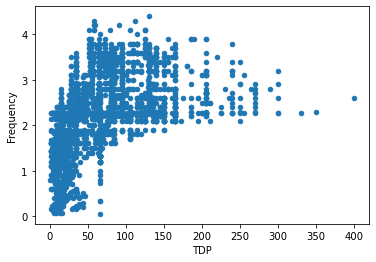

In [97]:
df1.plot.scatter('TDP', 'Frequency')

## קיבלנו ענן נקודות שמאוד מזכיר לנו פונקציה של אקספוננט. ניתן לראות שככל שמדד צריכת החשמל גבוה, כך כמות הפעולות לשנייה שהמעבד מסוגל לעשות היא גבוהה יותר

<AxesSubplot:xlabel='L3cache', ylabel='Frequency'>

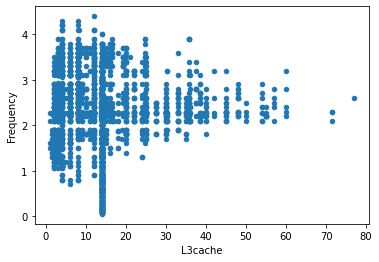

In [98]:
df1.plot.scatter('L3cache', 'Frequency')

## קיבלנו ענן נקודות מוזר יחסית. ישנו קו אנכי בולט שככל הנראה מייצג את הממוצע שכאמור, מילאנו את הערכים החסרים באמצעות הממוצע, לא ניתן להגיד באופן חד משמעי שכמות הזיכון מסוג אל-3 תשפיע על ביצועי המעבד

<AxesSubplot:xlabel='L2cache', ylabel='Frequency'>

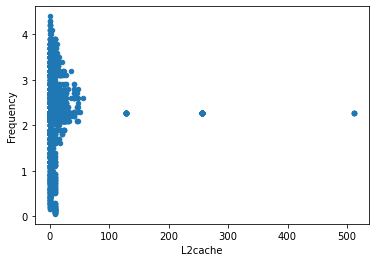

In [99]:
df1.plot.scatter('L2cache', 'Frequency')

## גם פה קיבלנו ענן נקודות מוזר יחסית. ישנו קו אנכי בולט שככל הנראה מייצג את הממוצע שכאמור, מילאנו את הערכים החסרים באמצעות הממוצע, לא ניתן להגיד באופן חד משמעי שכמות הזיכון מסוג אל-2 תשפיע על ביצועי המעבד

## מהצגת הנתונים הראשונית, ניתן להגיד שכמות הזיכרון מכל סוג כזה או אחר לא משפיעה על יכולות המעבד, ואילו ניתן להגיד שכמות צריכת החשמל משפיעה באופן שדומה ללוג על יכולות המעבד.

<AxesSubplot:xlabel='Socket', ylabel='Frequency'>

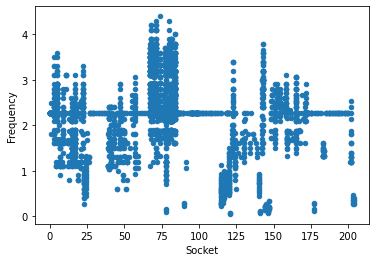

In [100]:
df1.plot.scatter('Socket', 'Frequency')

## אומנם קידדנו את ערכי הסוקט, אבל ניתן לראות שניתן להגיע לכמות פעולות לשנייה במגוון של סוגי סוקטים, אנחנו יכולים לראות שסוקט מסוים מגיע לכמות ביצועים אופטימלית ונציג אותו

In [101]:
Max_socket = df1.query('Frequency>=4.4')['Socket']


In [102]:
Max_socket ## קיבלנו תוצאה יחידה מה שאומר שערך זה הוא הגבוה ביותר

462    74.0
Name: Socket, dtype: float64

In [103]:
print(Socket_Encoder.inverse_transform(df1.Socket.astype(int))[Max_socket.index])

['LGA 1366']


In [104]:
print(df1.query('Frequency>=4.4')['Frequency'].iloc[0], 'GHz')

4.4 GHz


### קיבלנו את הסוקט שנותן לנו את הביצועים המירביים! לא מפתיע שזה הוא  LGA 1366, שכן סוקט זה הוא הסוקט שמיועד למעבדי אינטל מסוג xeon, מעבדי קצה שמיועדים לתחנות עבודה, שרתים, מערכות משובצות וכולי. כל אלה הם מחשבים שדורשים כוח עיבוד גבוה מאוד ולכן תוצאה זאת מאוד הגיונית.

# למידת מכונה!

## בפרוייקט אנחנו נחזה את מידת יכולת הביצועים של מעבד, כלומר מדד הfrequency. לשם כך אנו נשתמש ברגרסייה ליניארית, וזאת כדי לקבל מספר רציף המייצג את יכולת הביצועים של המעבד לפי המדדים של TDP.

In [105]:
x = df1['TDP'].values.reshape(df1['TDP'].shape[0],1)
y = df1['Frequency'].values.reshape(df1['Frequency'].shape[0],1)
Model = LinearRegression().fit(X=x, y=y)

In [106]:
x

array([[ 4.        ],
       [ 8.        ],
       [10.        ],
       ...,
       [45.        ],
       [66.03544956],
       [66.03544956]])

In [107]:
y

array([[1.6       ],
       [1.6       ],
       [1.67      ],
       ...,
       [2.6       ],
       [2.26081912],
       [2.26081912]])

In [108]:
print("R2:",r2_score(y,Model.predict(x)))

R2: 0.23985774351485867


## קיבלנו מודל לא כל כך טוב,  ננסה לשפר אותו באמצעות הוספת מאפיינים

In [109]:
x = df1[['TDP', 'Socket', 'I/O bus', 'L3cache','L3cache']]
y = df1['Frequency'].values.reshape(df1['TDP'].shape[0],1)
Model = LinearRegression().fit(X=x, y=y)

In [110]:
x

,TDP,Socket,I/O bus,L3cache,L3cache
0,4.00000,12.0,94.0,14.0,14.0
1,8.00000,12.0,94.0,14.0,14.0
2,10.00000,50.0,39.0,14.0,14.0
3,10.00000,50.0,39.0,14.0,14.0
4,13.00000,50.0,39.0,14.0,14.0
...,...,...,...,...,...
3516,35.00000,78.0,94.0,24.0,24.0
3517,35.00000,78.0,94.0,24.0,24.0
3518,45.00000,78.0,94.0,24.0,24.0
3519,66.03545,10.0,43.0,24.0,24.0


In [111]:
y

array([[1.6       ],
       [1.6       ],
       [1.67      ],
       ...,
       [2.6       ],
       [2.26081912],
       [2.26081912]])

In [112]:
print("R2:",r2_score(y,Model.predict(x.values)))

R2: 0.46102566342400786


## קיבלנו מודל משמעותית יותר טוב! ננסה לשפר אותו אפילו עוד יותר. ידוע שככל שכמות הזיכרון וצריכת החשמל עולה, כך גם כמות הביצועים. כלומר יש סינרגיה בין המדדים. 

In [113]:
df1['L2cache_TDP'] = df1['L2cache']*df1['TDP']
df1['L3cache_TDP'] = df1['L3cache']*df1['TDP']
df1['L3cache_L2cacheM'] = df1['L3cache']*df1['L2cache']
df1['L3cache_L2cache'] = df1['L3cache']+df1['L2cache']
df1['L3cacheRatio'] = df1['L3cache'] / df1['L3cache_L2cache']
df1['L2cacheRatio'] = df1['L2cache'] / df1['L3cache_L2cache']
df1['L3cache_L2cacheM_TDP'] = df1['L3cache_L2cacheM'] * df1['TDP']
df1['L3cache_L2cache_TDP'] = df1['L3cache_L2cache'] * df1['TDP']

In [114]:
x = df1[['L2cacheRatio','L3cacheRatio','L3cache_L2cache_TDP','L3cache_L2cacheM_TDP','GPUmodel','TDP', 'Socket', 'I/O bus', 'L3cache','L3cache','L2cache_TDP','L3cache_TDP','L3cache_L2cache','Frequency >=4','Frequency >=3','Frequency >=3.5','Frequency >=2']]
y = df1['Frequency'].values.reshape(df1['TDP'].shape[0],1)
Model = LinearRegression().fit(X=x, y=y)

In [115]:
x

,L2cacheRatio,L3cacheRatio,L3cache_L2cache_TDP,L3cache_L2cacheM_TDP,GPUmodel,TDP,Socket,I/O bus,L3cache,L3cache,L2cache_TDP,L3cache_TDP,L3cache_L2cache,Frequency >=4,Frequency >=3,Frequency >=3.5,Frequency >=2
0,0.035281,0.964719,58.048000,28.672000,32.0,4.00000,12.0,94.0,14.0,14.0,2.048000,56.00000,14.512000,0,0,0,0
1,0.068158,0.931842,120.192000,114.688000,32.0,8.00000,12.0,94.0,14.0,14.0,8.192000,112.00000,15.024000,0,0,0,0
2,0.035281,0.964719,145.120000,71.680000,32.0,10.00000,50.0,39.0,14.0,14.0,5.120000,140.00000,14.512000,0,0,0,0
3,0.035281,0.964719,145.120000,71.680000,32.0,10.00000,50.0,39.0,14.0,14.0,5.120000,140.00000,14.512000,0,0,0,0
4,0.068158,0.931842,195.312000,186.368000,32.0,13.00000,50.0,39.0,14.0,14.0,13.312000,182.00000,15.024000,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3516,0.294118,0.705882,1190.000000,8400.000000,92.0,35.00000,78.0,94.0,24.0,24.0,350.000000,840.00000,34.000000,0,0,0,1
3517,0.294118,0.705882,1190.000000,8400.000000,92.0,35.00000,78.0,94.0,24.0,24.0,350.000000,840.00000,34.000000,0,0,0,1
3518,0.294118,0.705882,1530.000000,10800.000000,92.0,45.00000,78.0,94.0,24.0,24.0,450.000000,1080.00000,34.000000,0,0,0,1
3519,0.285916,0.714084,2219.417987,15229.612745,66.0,66.03545,10.0,43.0,24.0,24.0,634.567198,1584.85079,33.609493,0,0,0,1


In [116]:
y

array([[1.6       ],
       [1.6       ],
       [1.67      ],
       ...,
       [2.6       ],
       [2.26081912],
       [2.26081912]])

In [117]:
print("R2:",r2_score(y,Model.predict(x.values)))

R2: 0.8554467449783485


## הצלחנו לשפר ביותר מפי 4 מהמודל ההתחלתי! ניתן להסתפק בתוצאה זאת, שכן ביצועי המעבדים תלויים בעוד המון פרמטים שלצערי לא היה ניתן למצוא במקור המידע שבחרתי (לדוגמת מס' הטרנזיסטורים).

## לפעמים לא נרצה לדעת את המספר המדויק של כמו הפעולות לשנייה שהמעבד מבצע, ולכן ניצור עכשיו עוד מודל, מסוג רגרסייה לוגיסטית, שיבדוק את ההיתכנות שלפי נתונים מסויימים, כמות הפעולות לשנייה במעבד גדולה מערך סף מסוים

In [118]:
LogisticModel=LogisticRegression()
LogisticModel.fit(df1[['L2cacheRatio','L3cacheRatio','L3cache_L2cache_TDP','L3cache_L2cacheM_TDP','GPUmodel','TDP', 'Socket', 'I/O bus', 'L3cache','L3cache','L2cache_TDP','L3cache_TDP','L3cache_L2cache','Frequency >=4','Frequency >=3.5','Frequency >=2']],df1['Frequency >=3'])

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [119]:
y_actual = df1['Frequency >=3']
y_pred = LogisticModel.predict(df1[['L2cacheRatio','L3cacheRatio','L3cache_L2cache_TDP','L3cache_L2cacheM_TDP','GPUmodel','TDP', 'Socket', 'I/O bus', 'L3cache','L3cache','L2cache_TDP','L3cache_TDP','L3cache_L2cache','Frequency >=4','Frequency >=2','Frequency >=3.5']])

In [120]:
print("accuracy is:",accuracy_score(y_actual, y_pred))
print("precision is:",precision_score(y_actual, y_pred))
print("recall is:",recall_score(y_actual, y_pred))
print("f1 is:",f1_score(y_actual, y_pred))

accuracy is: 0.8423743254757171
precision is: 0.543859649122807
recall is: 0.41680672268907565
f1 is: 0.47193149381541394


In [121]:
confusion_matrix(y_actual, y_pred)

array([[2718,  208],
       [ 347,  248]])

In [122]:
LogisticModel=LogisticRegression()
LogisticModel.fit(df1[['L2cacheRatio','L3cacheRatio','L3cache_L2cache_TDP','L3cache_L2cacheM_TDP','GPUmodel','TDP', 'Socket', 'I/O bus', 'L3cache','L3cache','L2cache_TDP','L3cache_TDP','L3cache_L2cache','Frequency >=4','Frequency >=3','Frequency >=2']],df1['Frequency >=3.5'])

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [123]:
y_actual = df1['Frequency >=3.5']
y_pred = LogisticModel.predict(df1[['L2cacheRatio','L3cacheRatio','L3cache_L2cache_TDP','L3cache_L2cacheM_TDP','GPUmodel','TDP', 'Socket', 'I/O bus', 'L3cache','L3cache','L2cache_TDP','L3cache_TDP','L3cache_L2cache','Frequency >=4','Frequency >=3','Frequency >=2']])

In [124]:
print("accuracy is:",accuracy_score(y_actual, y_pred))
print("precision is:",precision_score(y_actual, y_pred))
print("recall is:",recall_score(y_actual, y_pred))
print("f1 is:",f1_score(y_actual, y_pred))

accuracy is: 0.9224652087475149
precision is: 0.15254237288135594
recall is: 0.03879310344827586
f1 is: 0.06185567010309279


In [125]:
confusion_matrix(y_actual, y_pred)

array([[3239,   50],
       [ 223,    9]])

## מן הסתם שערכי המדדים ירדו וכן הconfusion matrix תשתנה בהתאם כי יש פחות ופחות ערכים מתאימים כשמעלים את הסף, סה"כ קיבלנו מדדים טובים!

# לסיכום

## אנחנו רואים כי אנחנו מקבלים תוצאות מדדים לא רעות בכלל. לפי מודל זה ניתן לחזות את ביצועי המעבד באופן לא רע בכלל, ומצאנו קשר בין מדדים שונים לכמות הפעולות שמעבד יכול לבצע בשנייה